In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline


In [ ]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)



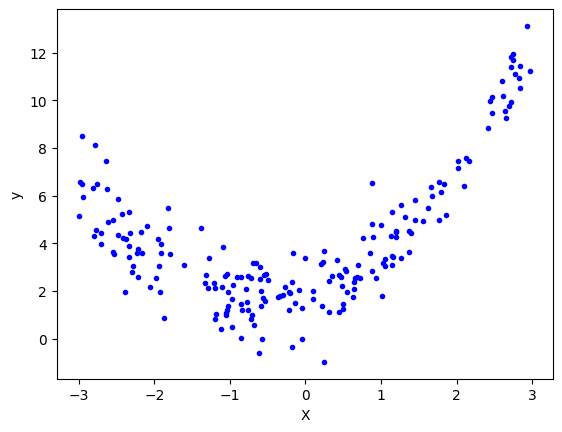

In [ ]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
lr=LinearRegression()

In [ ]:
lr=LinearRegression()
lr.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(X_test.reshape(-1, 1))

In [ ]:
r2_score(y_test, y_pred)

0.259424944804423

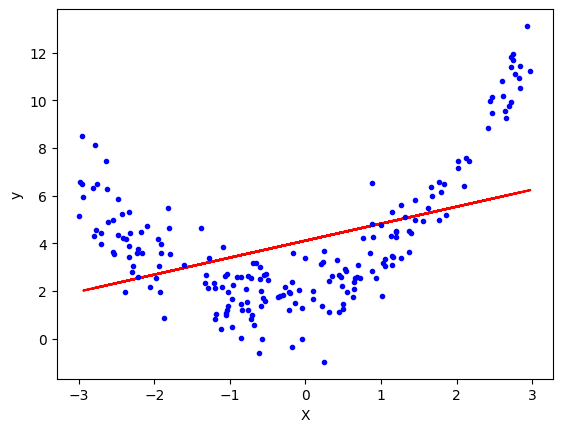

In [ ]:
plt.plot(X_test,lr.predict(X_test.reshape(-1, 1)),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
poly=PolynomialFeatures(degree=2)

In [ ]:
X_train_new=poly.fit_transform(X_train)
X_test_new=poly.transform(X_test)

In [ ]:
X_train[0]

array([0.09833742])

In [ ]:
X_train_new[0]

array([1.        , 0.09833742, 0.00967025])

In [ ]:
X_test_new[0]

array([ 1.        , -2.70351878,  7.30901379])

In [ ]:
plr=LinearRegression()

In [ ]:
plr.fit(X_train_new, y_train)

LinearRegression()

In [ ]:
y_pred=plr.predict(X_test_new)

In [ ]:
r2_score(y_test, y_pred)

0.8832872335594179

In [ ]:
plr.coef_

array([[0.        , 0.92844595, 0.8204536 ]])

In [ ]:
plr.intercept_

array([2.04599451])

In [ ]:
X_new=np.linspace(-3, 3, 200).reshape(200,1)

In [ ]:
X_new_poly =poly.transform(X_new)

In [ ]:
y_new=y_new = plr.predict(X_new_poly)


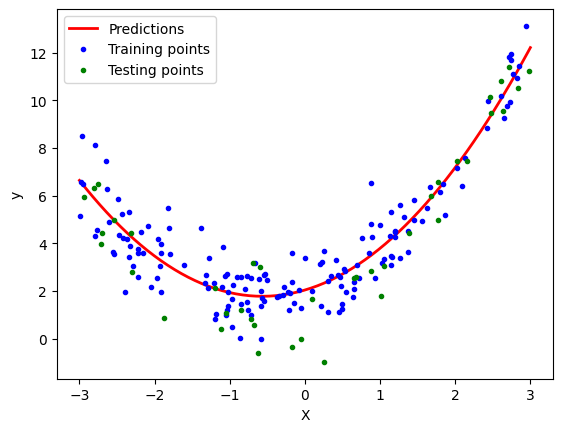

In [ ]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()


    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)

    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()






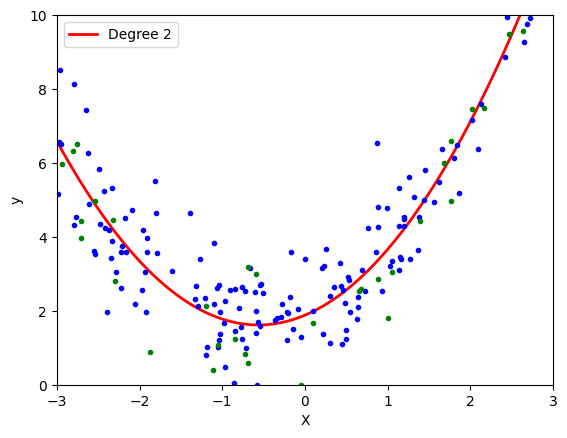

In [ ]:
polynomial_regression(2)

In [ ]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()


    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)

    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()






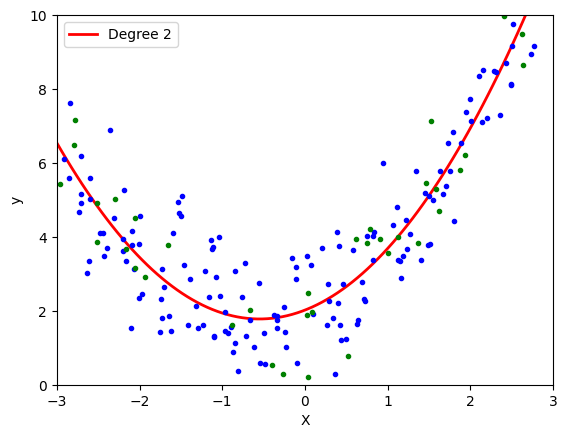

In [ ]:
polynomial_regression(2)


In [ ]:
poly.powers_

array([[0],
       [1],
       [2]])

In [ ]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2


In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [ ]:
x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)



In [ ]:
xGrid, yGrid = np.meshgrid(x_input,y_input)
final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T
xGrid.ravel().shape

(100,)

In [ ]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape


(100, 2)

In [ ]:
poly = PolynomialFeatures(degree=2)
X_multi_trans = poly.fit_transform(X_multi)


In [ ]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

X_test_multi = poly.transform(final)
X_test_multi.shape

(100, 6)

In [ ]:
z_final = lr.predict(X_test_multi).reshape(10,10)


In [ ]:
import plotly.graph_objects as go

# Redefine x, y, z to ensure correct dimensions
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8
z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)

fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
import plotly.graph_objects as go



In [ ]:
def ployregressor(degree):

    #Draw line

    x = 7 * np.random.rand(100, 1) - 2.8
    y = 7 * np.random.rand(100, 1) - 2.8

    z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.normal(0, 3, size=x.shape)

    #Graph

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, c=z, cmap='viridis', s=20)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title('3D Polynomial Regression Data')
    plt.show()

    #get ranom line

    x_input = np.linspace(x.min(), x.max(), 10)
    y_input = np.linspace(y.min(), y.max(), 10)


    xGrid, yGrid = np.meshgrid(x_input,y_input)
    final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T


    #data
    X_multi = np.array([x,y]).reshape(100,2)

    #poly
    poly = PolynomialFeatures(degree)

    #tranform

    X_multi_trans = poly.fit_transform(X_multi)
    X_test_multi = poly.transform(final)

    #Model
    lr = LinearRegression()
    lr.fit(X_multi_trans,z)

    # prediction


    z_final = lr.predict(X_test_multi).reshape(10,10)


    # Redefine x, y, z to ensure correct dimensions
    x = 7 * np.random.rand(100, 1) - 2.8
    y = 7 * np.random.rand(100, 1) - 2.8
    z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)

    fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

    fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

    fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

    fig.show()


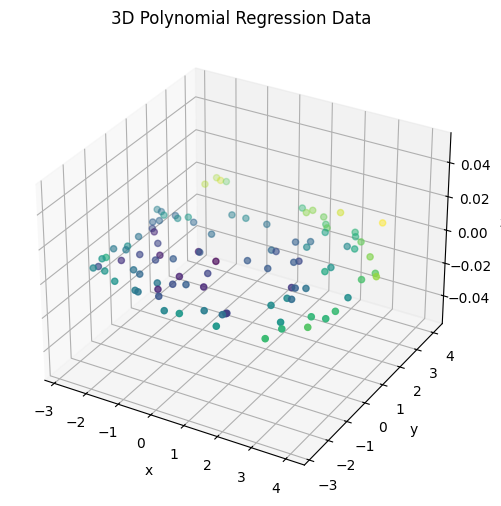

In [ ]:
ployregressor(4)